In [1]:
from path_planning import GraphXY, dijkstra, get_path, plot_map
import imageio.v2 as iio
import os
import matplotlib.pyplot as plt

In [2]:
# Cleanup
%rm frames/*.png

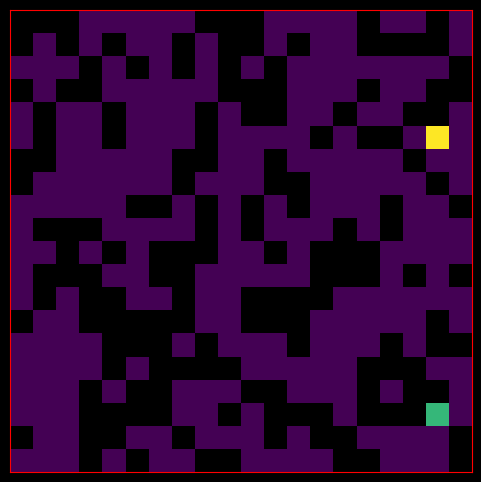

In [3]:
graph = GraphXY(20, 20)
fig, ax = graph.plot()
frame_number = 0
for _ in range(20):
    fig.savefig(f"frames/{frame_number}.png")
    frame_number += 1

In [4]:
# dist = dijkstra(graph)
frame_number += 1
for dist in dijkstra(graph):
    fig, ax = plot_map(dist, cmap="coolwarm")
    fig.savefig(f"frames/{frame_number}.png")
    plt.close(fig)
    frame_number += 1

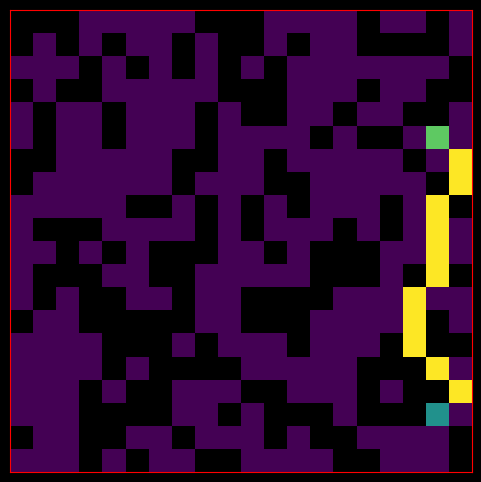

In [5]:
path = get_path(graph, dist)
graph.mark_path(path)
fig, ax = graph.plot()
for _ in range(20):
    frame_number += 1
    fig.savefig(f"frames/{frame_number}.png")

In [6]:
frames = [fn for fn in os.listdir("frames") if ".png" in fn]
frames.sort(key=lambda x: int(x.split(".")[0]))
#print(frames)
frame_length = 0.1 # seconds
with iio.get_writer("dijkstra.gif", duration=frame_length) as gif_writer:
    for filename in frames:
        image = iio.imread(f"frames/{filename}")
        gif_writer.append_data(image)